In [3]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
def qpe_circuit(unitary, eigenstate, num_qubits):
    # Crear el circuito con los qubits necesarios
    qc = QuantumCircuit(num_qubits + 1, num_qubits)

    # Aplicar Hadamard a todos los qubits del registro de fase
    for qubit in range(num_qubits):
        qc.h(qubit)

    # Aplicar las puertas de control-Unitario
    for qubit in range(num_qubits):
        qc.cp(2 * np.pi / 2*(qubit + 1), qubit, num_qubits)

    # Aplicar QFT Inversa
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

    # Medir los qubits del registro de fase
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

In [5]:
num_qubits = 3

In [8]:
theta = 0.25
unitary = QuantumCircuit(1)
unitary.rz(2* np.pi * theta, 0)
unitary_gate = unitary.to_gate().control()

In [10]:
eigenstate = QuantumCircuit(1)
eigenstate.h(0)

In [12]:
qc = qpe_circuit(unitary_gate, eigenstate, num_qubits)

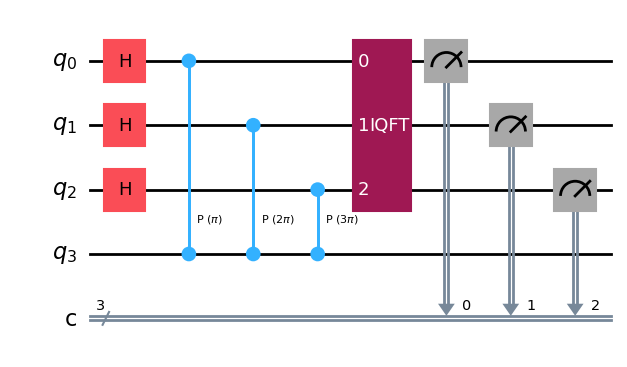

In [13]:
qc.draw('mpl')